In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\Hp\\Downloads\\ML\\Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [2]:
print('='*50)
print("Columns in data")
print('='*50)
print(df.columns.values)

Columns in data
['sl_no' 'gender' 'ssc_p' 'ssc_b' 'hsc_p' 'hsc_b' 'hsc_s' 'degree_p'
 'degree_t' 'workex' 'etest_p' 'specialisation' 'mba_p' 'status' 'salary']


In [3]:
print('='*20)
print("Data shape")
print('='*20)
print(df.shape)

Data shape
(215, 15)


In [4]:
print('='*50)
print("\nDescribe data\n")
print('='*50) 
print(df.describe())


Describe data

            sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000  


In [5]:
print('='*50)
print("\nData Information\n")
print('='*50) 
print(df.info())


Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


In [6]:
#As it is clear that we don't need sl_no in training model 
df = df.drop(['sl_no'], axis=1)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

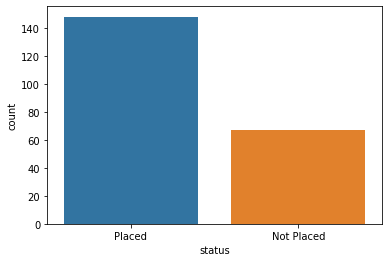

In [8]:
#The Class Variable; Status
sns.countplot('status', data=df)

In [9]:
#Let's check whethere gender affect on placement.
#Out of 215 candidates, 139 are male and 76 are female.
df['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [10]:
df1 = pd.DataFrame(df.groupby(['gender','status'])['status'].count())
df1

status
gender status            
F      Not Placed      28
       Placed          48
M      Not Placed      39
       Placed         100

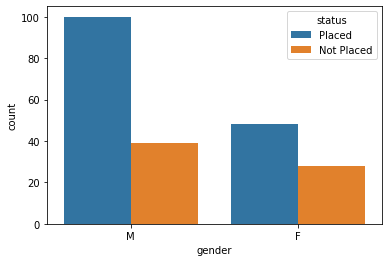

In [11]:
sns.countplot(x='gender', hue='status', data=df)

In [ ]:
#Male have high chances of getting placed compared to females.

Text(0.5, 0, 'SSC %')

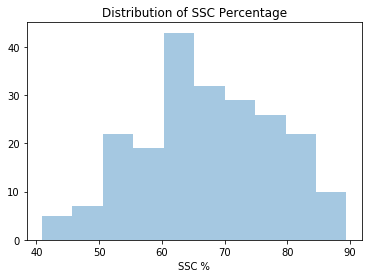

In [12]:
sns.distplot(df['ssc_p'], kde=False)
plt.title('Distribution of SSC Percentage')
plt.xlabel('SSC %')

Text(10.049999999999997, 0.5, 'SSC %')

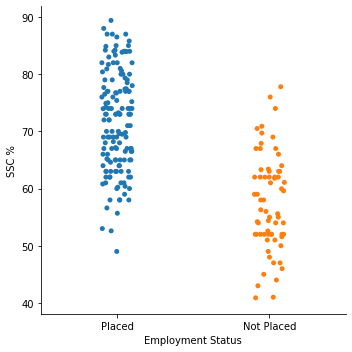

In [13]:
sns.catplot(y='ssc_p', x='status', data=df)
plt.xlabel('Employment Status')
plt.ylabel('SSC %')

In [ ]:
#Students who are place have higer percentage in SSC.

In [14]:
df['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

Text(0.5, 0, 'HSC %')

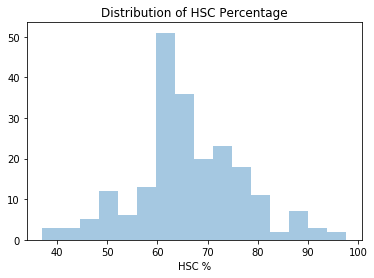

In [15]:
sns.distplot(df['hsc_p'], kde=False)
plt.title('Distribution of HSC Percentage')
plt.xlabel('HSC %')

Text(3.799999999999997, 0.5, 'HSC %')

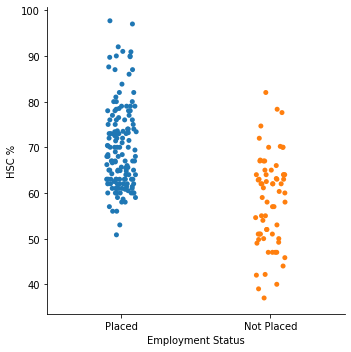

In [16]:
sns.catplot(y='hsc_p', x='status', data=df)
plt.xlabel('Employment Status')
plt.ylabel('HSC %')

#HSC percentage are important features. As all placed students have higher percentages.

In [17]:
df['hsc_b'].value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [18]:
df1 = pd.DataFrame(df.groupby(['hsc_b','status'])['status'].count())
df1

status
hsc_b   status            
Central Not Placed      27
        Placed          57
Others  Not Placed      40
        Placed          91

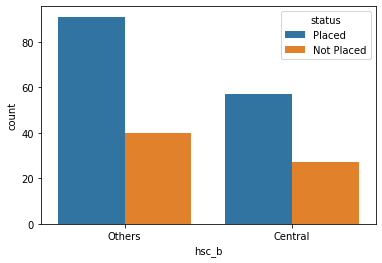

In [19]:
sns.countplot(x='hsc_b', hue='status', data=df)

In [ ]:
#From the above analysis I can say that, SSC board is not important to recruiters when it come to hiring candidates. 
#So I am not going to use this feature while training model.

In [20]:
df['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [21]:
df1 = pd.DataFrame(df.groupby(['hsc_s','status'])['status'].count())
df1

status
hsc_s    status            
Arts     Not Placed       5
         Placed           6
Commerce Not Placed      34
         Placed          79
Science  Not Placed      28
         Placed          63

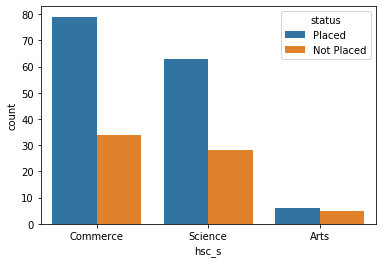

In [22]:
sns.countplot(x='hsc_s', hue='status', data=df)

Text(0.5, 0, 'Degree %')

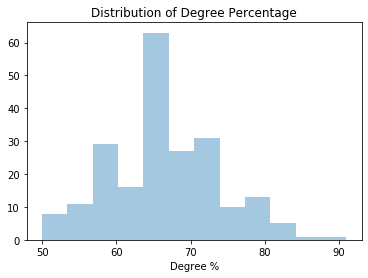

In [23]:
sns.distplot(df['degree_p'], kde=False)
plt.title('Distribution of Degree Percentage')
plt.xlabel('Degree %')

Text(10.049999999999997, 0.5, 'Degree %')

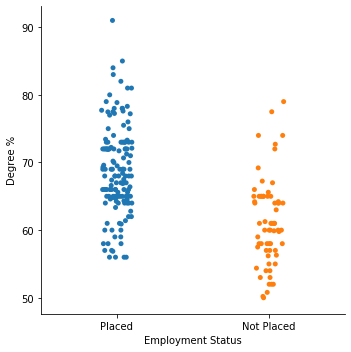

In [24]:
sns.catplot(y='degree_p', x='status', data=df)
plt.xlabel('Employment Status')
plt.ylabel('Degree %')

In [ ]:
#Like SSC and HSC percentages, Degree Percentages are also impotant factor to get placed.

In [25]:
df['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [26]:
df1 = pd.DataFrame(df.groupby(['degree_t','status'])['status'].count())
df1

status
degree_t  status            
Comm&Mgmt Not Placed      43
          Placed         102
Others    Not Placed       6
          Placed           5
Sci&Tech  Not Placed      18
          Placed          41

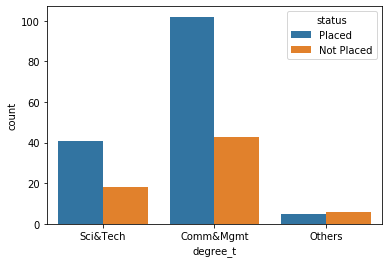

In [27]:
sns.countplot(x='degree_t', hue='status', data=df)

In [28]:
df['workex'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

In [29]:
df1 = pd.DataFrame(df.groupby(['workex','status'])['status'].count())
df1

status
workex status            
No     Not Placed      57
       Placed          84
Yes    Not Placed      10
       Placed          64

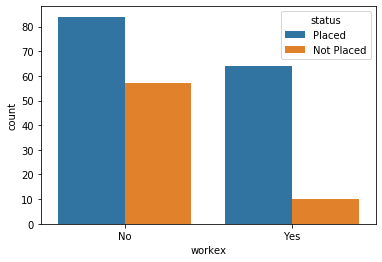

In [30]:
sns.countplot(x='workex', hue='status', data=df)

In [ ]:
#It is clear that candidate with work experience have higher chance of getting placed.

Text(0.5, 0, 'Employment Test %')

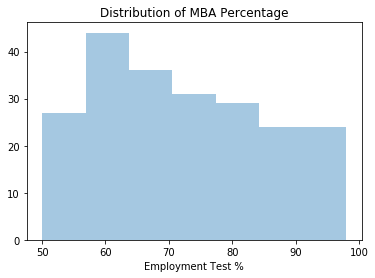

In [31]:
sns.distplot(df['etest_p'], kde=False)
plt.title('Distribution of MBA Percentage')
plt.xlabel('Employment Test %')

Text(3.799999999999997, 0.5, 'Employment Test %')

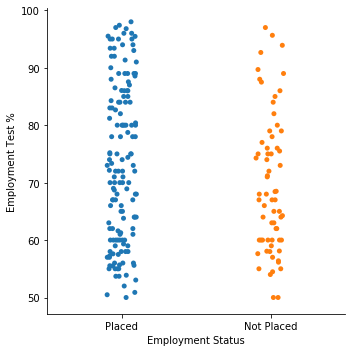

In [32]:
sns.catplot(y='etest_p', x='status', data=df)
plt.xlabel('Employment Status')
plt.ylabel('Employment Test %')

In [33]:
df['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [34]:
df1 = pd.DataFrame(df.groupby(['specialisation','status'])['status'].count())
df1

status
specialisation status            
Mkt&Fin        Not Placed      25
               Placed          95
Mkt&HR         Not Placed      42
               Placed          53

Text(0.5, 0, 'MBA Specialization')

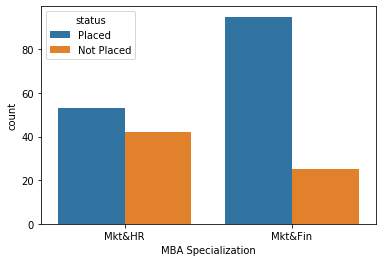

In [35]:
sns.countplot(x='specialisation', hue='status', data=df)
plt.xlabel('MBA Specialization')

Text(0.5, 0, 'MBA %')

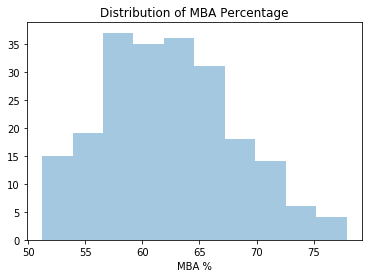

In [36]:
sns.distplot(df['mba_p'], kde=False)
plt.title('Distribution of MBA Percentage')
plt.xlabel('MBA %')

Text(9.924999999999997, 0.5, 'MBA %')

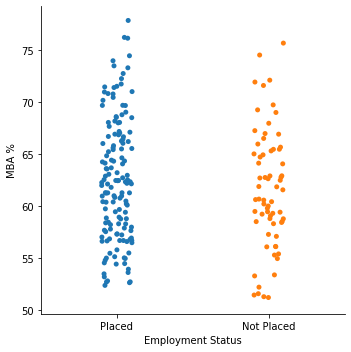

In [37]:
sns.catplot(y='mba_p', x='status', data=df)
plt.xlabel('Employment Status')
plt.ylabel('MBA %')

Text(0.5, 0, 'Salary')

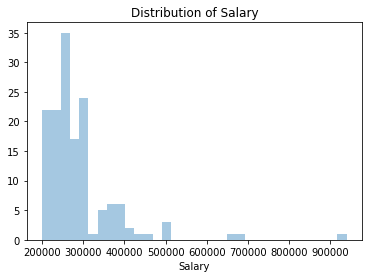

In [38]:
sns.distplot(df['salary'], kde=False)
plt.title('Distribution of Salary')
plt.xlabel('Salary')

Text(-14.950000000000003, 0.5, 'Salary')

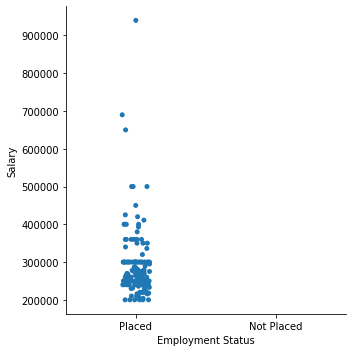

In [39]:
sns.catplot(y='salary', x='status', data=df)
plt.xlabel('Employment Status')
plt.ylabel('Salary')

In [ ]:
#It is obvious, we dont have salary details of Un-Placed candidate. 
#Salary feature alone is enough to classify the placement status of candidate (if salary > 0 then placed else not placed). 
#However, if we want to use only salary feature then we dont need machine learning for that, by looking only we can do that. 
#So I am going to drop this column while performing classification model training.

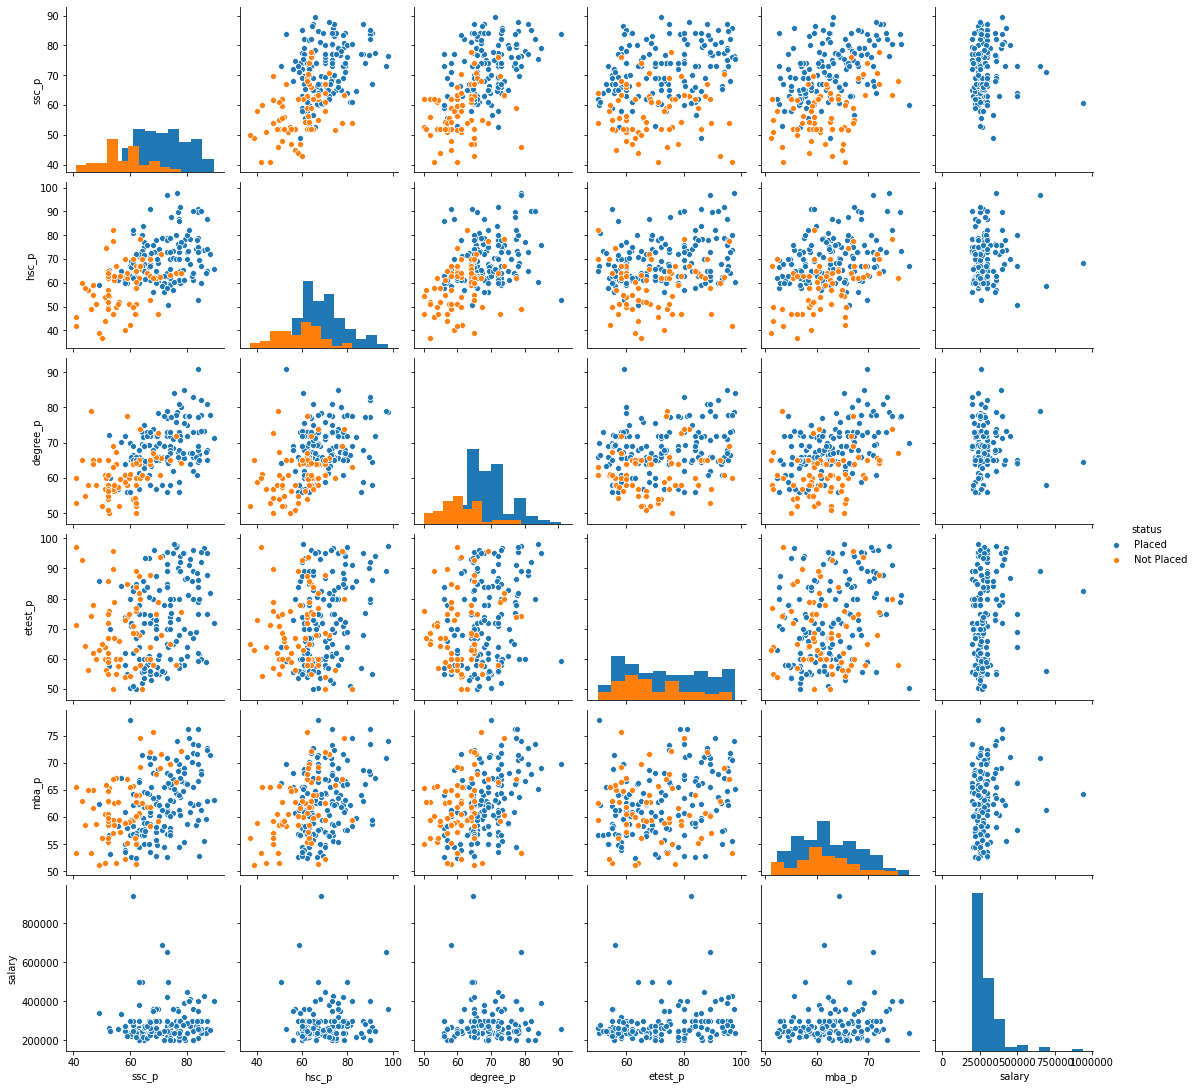

In [40]:
#Correlation between features
sns.pairplot(data=df[['ssc_p','hsc_p','degree_p', 'etest_p','mba_p','salary', 'status']], hue="status", diag_kind='hist')

In [41]:
#drop unwanted columns
df.drop(['ssc_b','hsc_b', 'hsc_s', 'degree_t', 'salary'], axis=1, inplace=True)
df.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed


In [42]:
#map categorical feature to numeric one
df["gender"] = df.gender.map({"M":0,"F":1})
df["workex"] = df.workex.map({"No":0, "Yes":1})
df["status"] = df.status.map({"Not Placed":0, "Placed":1})
df["specialisation"] = df.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [43]:
df.columns

Index(['gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p',
       'specialisation', 'mba_p', 'status'],
      dtype='object')

In [44]:
df.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,0,85.80,73.60,73.30,0,96.8,1,55.50,1


In [45]:
def new_features(df1):
    df1['hsc_to_ssc'] = df1['hsc_p'] / df1['ssc_p']
    df1['degree_to_hsc'] = df1['degree_p'] / df1['hsc_p']
    df1['degree_to_ssc'] = df1['degree_p'] / df1['ssc_p']
    df1['mba_to_degree'] = df1['mba_p'] / df1['degree_p']
    df1['mba_to_etest'] = df1['mba_p'] / df1['etest_p']
        
    return df1
df = new_features(df)

In [46]:
#Train and Test Split
# Seperating Features and Target
X = df.copy().drop('status', axis=1)
y = df['status']

In [47]:
from sklearn import preprocessing
# scale each features
X_scaled = preprocessing.scale(X)

In [48]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3)
X_train.shape, Y_train.shape, X_test.shape

((150, 13), (150,), (65, 13))

In [49]:
from sklearn.neighbors import KNeighborsClassifier
# k-nearest neighbor
knn = KNeighborsClassifier(n_neighbors =10)
knn.fit(X_train, Y_train)
knn_Y_pred = knn.predict(X_test)
knn_accuracy = knn.score(X_test, Y_test)
knn_accuracy

0.8769230769230769

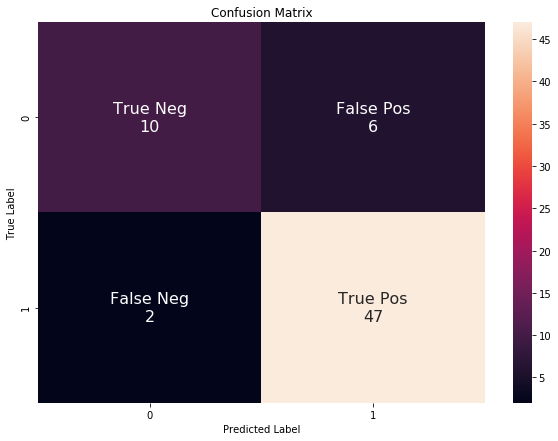

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
conf_mat = confusion_matrix(Y_test, knn_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [51]:
print(classification_report(Y_test, knn_Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71        16
           1       0.89      0.96      0.92        49

    accuracy                           0.88        65
   macro avg       0.86      0.79      0.82        65
weighted avg       0.87      0.88      0.87        65



In [52]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
svm_Y_pred = svc.predict(X_test)
svc_accuracy = svc.score(X_test, Y_test)
svc_accuracy

0.8923076923076924

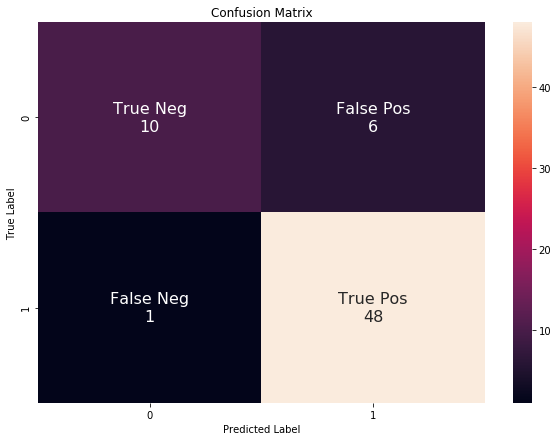

In [53]:
conf_mat = confusion_matrix(Y_test, svm_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
print(classification_report(Y_test, svm_Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74        16
           1       0.89      0.98      0.93        49

    accuracy                           0.89        65
   macro avg       0.90      0.80      0.84        65
weighted avg       0.89      0.89      0.88        65



In [55]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=1000,criterion='entropy')
random_forest.fit(X_train, Y_train)
random_forest_Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
random_forest_accuracy = random_forest.score(X_test, Y_test)
random_forest_accuracy

0.8461538461538461

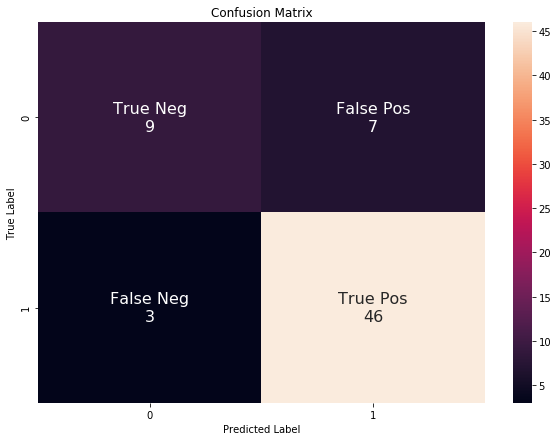

In [56]:

conf_mat = confusion_matrix(Y_test, random_forest_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [57]:
print(classification_report(Y_test, random_forest_Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.56      0.64        16
           1       0.87      0.94      0.90        49

    accuracy                           0.85        65
   macro avg       0.81      0.75      0.77        65
weighted avg       0.84      0.85      0.84        65



In [58]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN','Random Forest'],
    'Score': [svc_accuracy, knn_accuracy,random_forest_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.892308
1,KNN,0.876923
2,Random Forest,0.846154
